2025-04-27 17:12:31.588356: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 17:12:31.858703: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 17:12:32.121253: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745788352.369816    4535 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745788352.437976    4535 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-27 17:12:40.576174: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Fa

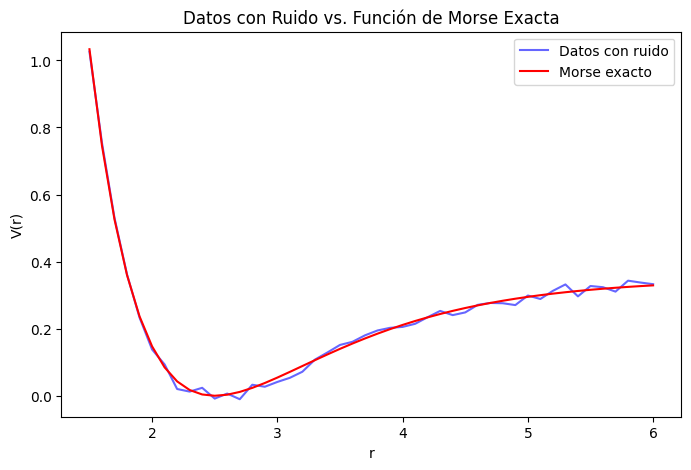

In [1]:
import numpy as np #type: ignore
import matplotlib.pyplot as plt #type: ignore
import tensorflow as tf #type: ignore
from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import Dense #type: ignore


def morsepotential(q, D, alpha, E0, R_eq):
    return D*(1.0 - np.exp(-alpha*(q-R_eq)))**2 + E0


r_values = np.linspace(1.5, 6.0, 46) #qvec


# Agregamos ruido gaussiano
#ruido = np.random.normal(scale=0.01)  # Ajusta la escala según necesites

ruido = 0.025*(np.random.random(len(r_values))-np.random.random(len(r_values)))  # Ruido aleatorio entre -0.025 y 0.025)
V_noisy = morsepotential(r_values,0.35,1.0,0.0,2.5) + ruido

r_values_tf = tf.convert_to_tensor(r_values, dtype=tf.float32)
V_noisy_tf = tf.convert_to_tensor(V_noisy, dtype=tf.float32)

plt.figure(figsize=(8, 5))
plt.plot(r_values, V_noisy, label="Datos con ruido", color='blue', alpha=0.6)
plt.plot(r_values, morsepotential(r_values,0.35,1.0,0.0,2.5), label="Morse exacto", color='red', linewidth=1.5)
plt.xlabel("r")
plt.ylabel("V(r)")
plt.legend()
plt.title("Datos con Ruido vs. Función de Morse Exacta")
plt.show()

In [2]:
print(r_values)
print(V_noisy.shape)

#r_values.reshape(-1, 1)  # Cambia la forma de r_values para que sea un vector columna

[1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2
 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.
 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6. ]
(46,)


In [11]:
import tensorflow as tf
import keras.optimizers #type: ignore
from keras.models import Model #type: ignore
from keras.layers import Input, Dense #type: ignore

tf.random.set_seed(42)
np.random.seed(42)

loss_histories = {}
y_preds = {}
learning_rates = [0.1, 0.01, 0.001, 0.0001]

ep = 150
pv = 0.2

for lr in learning_rates:
    opt = keras.optimizers.Adam(learning_rate=lr)
    inputs = Input(shape=(1,))

    hidden1 = Dense(90, activation='relu')(inputs)
    hidden2 = Dense(90, activation='relu')(hidden1)
    hidden3 = Dense(90, activation='relu')(hidden2)
    hidden4 = Dense(90, activation='relu')(hidden3)
    hidden5 = Dense(50, activation='relu')(hidden4)

    outputs = Dense(1, activation='linear')(hidden5)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=opt, loss='mse', metrics=['mse'])

    print(f"Learning rate: {lr}")

    history = model.fit(r_values_tf,V_noisy_tf, epochs=ep, validation_split=pv,)
    loss_histories[lr] = history.history

    y_preds[lr] = model.predict(r_values_tf)


Learning rate: 0.1
Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 398ms/step - loss: 688.5117 - mse: 688.5117 - val_loss: 7.6251 - val_mse: 7.6251
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 3.1224 - mse: 3.1224 - val_loss: 26.5999 - val_mse: 26.5999
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 12.4810 - mse: 12.4810 - val_loss: 93.7974 - val_mse: 93.7974
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 16.9305 - mse: 16.9305 - val_loss: 1.2028 - val_mse: 1.2028
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 1.5311 - mse: 1.5311 - val_loss: 8.0467 - val_mse: 8.0467
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 7.0535 - mse: 7.0535 - val_loss: 2.0781 - val_mse: 2.0781
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 2.5421 - mse: 2.5421 - val_loss: 0.1613 - val_mse: 0.1613
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.3125 - mse: 0.3125 - val_loss: 3.3784 - val_mse: 3.3784
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

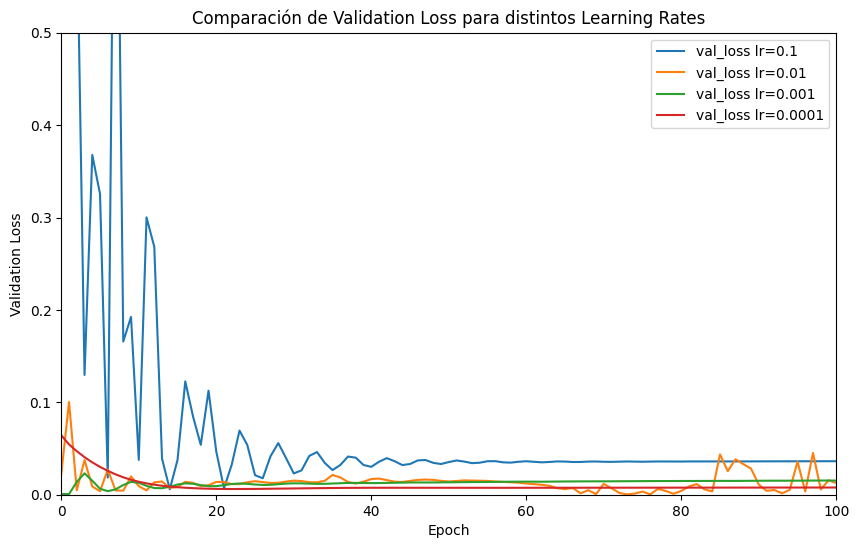

In [9]:
plt.figure(figsize=(10,6))
for lr, history in loss_histories.items():
    plt.plot(history['val_loss'], label=f'val_loss lr={lr}')
plt.axis([0, ep-400, 0, 0.5])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Comparación de Validation Loss para distintos Learning Rates')
plt.legend()
plt.show()


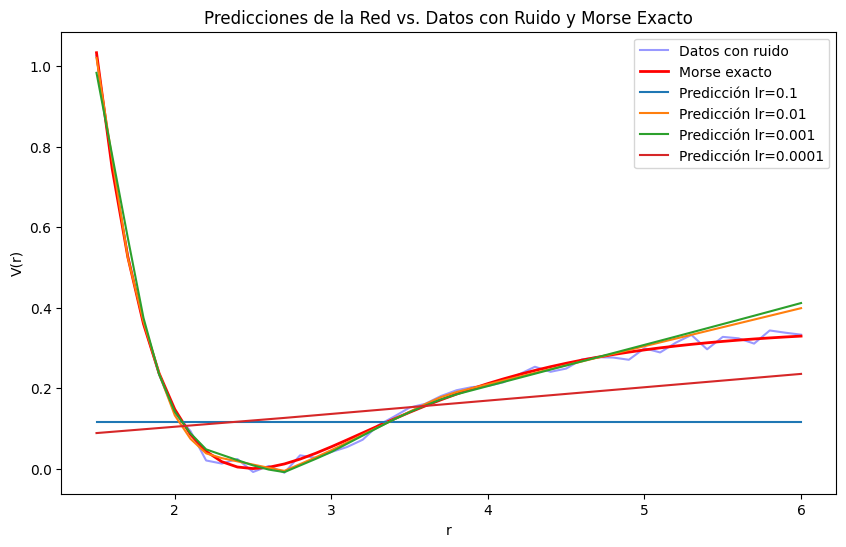

In [14]:
plt.figure(figsize=(10,6))

#Datos originales con ruido
plt.plot(r_values, V_noisy, label="Datos con ruido", color='blue', alpha=0.4)

#Morse exacto
plt.plot(r_values, morsepotential(r_values, 0.35, 1.0, 0.0, 2.5), label="Morse exacto", color='red', linewidth=2)

#Predicciones de cada lr
for lr, y_pred in y_preds.items():
    plt.plot(r_values, y_pred, label=f"Predicción lr={lr}", linewidth=1.5)

plt.xlabel("r")
plt.ylabel("V(r)")
plt.title("Predicciones de la Red vs. Datos con Ruido y Morse Exacto")
plt.legend()
plt.show()
